In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataOutput = '/home/olivia/mothPruning/mothMachineLearning_dataAndFigs/DataOutput/Experiments/'

modeltimestamp = '2022_01_04__04_18_29'

modelSubdir = os.path.join(dataOutput, modeltimestamp)
if not os.path.exists(modelSubdir):
    os.mkdir(modelSubdir)
    
Subdir = os.path.join(modelSubdir, 'preprocessedNets')
if not os.path.exists(Subdir):
    os.mkdir(Subdir)

historyFile = 'errors_minmax_Adam5_sample.pkl'
history = pickle.load(open(os.path.join(modelSubdir, historyFile), 'rb'))

weightsFile = 'weights_minmax_Adam5_sample.pkl'
weights = pickle.load(open(os.path.join(modelSubdir, weightsFile), 'rb'))

biasesFile = 'biases_minmax_Adam5_sample.pkl'
biases = pickle.load(open(os.path.join(modelSubdir, biasesFile), 'rb'))

masksFile = 'masks_minmax_Adam5_sample.pkl'
masks = pickle.load(open(os.path.join(modelSubdir, masksFile), 'rb'))

lossesFile = 'allPruneLosses_Adam5_sample.pkl'
losses = pickle.load(open(os.path.join(modelSubdir, lossesFile), 'rb'))

epochlossesFile = 'lossesAllNets_Adam5_sample.pkl'
epochlosses = pickle.load(open(os.path.join(modelSubdir, epochlossesFile), 'rb'))

In [12]:
weights[0][0].shape

(10, 10, 800)

In [3]:
networks = []

#Iterate over networks
for i in range(weights[0][0].shape[0]):
    prunes = []
    #Iterate over prunes
    for j in range(len(weights)):
        layers = []
        #Iterate over layers
        for k in range(len(weights[0])):
            w = np.multiply(weights[j][k][i], masks[j][k][i])
            b = biases[j][k][i]
            layers.append(w)
            layers.append(b)
        prunes.append(layers)
    networks.append(prunes)

In [4]:
epochlosses = np.array(epochlosses)

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [6]:
epochLossesFlat = np.zeros((1,10))
#1 by number of networks trained 
for i in range(len(epochlosses)):
    epochLossesFlat = np.append(epochLossesFlat,epochlosses[i], axis=0)
    
epochLossesFlat = np.delete(epochLossesFlat, 0, 0)

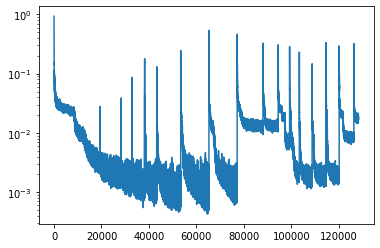

In [7]:
plt.plot(epochLossesFlat[:,0])
plt.yscale('log')

In [9]:
pickle.dump(weights, open(os.path.join(Subdir, 'weights.pkl'), 'wb'))
pickle.dump(biases, open(os.path.join(Subdir, 'biases.pkl'), 'wb'))
pickle.dump(masks, open(os.path.join(Subdir, 'masks.pkl'), 'wb'))
pickle.dump(history, open(os.path.join(Subdir, 'meanHistory.pkl'), 'wb'))
pickle.dump(networks, open(os.path.join(Subdir, 'networks.pkl'), 'wb'))
pickle.dump(losses, open(os.path.join(Subdir, 'pruneLosses.pkl'), 'wb'))
pickle.dump(epochLossesFlat, open(os.path.join(Subdir, 'epochLosses.pkl'), 'wb'))

In [10]:
ind=0
for i in range(len(epochlosses)):
    ind += len(epochlosses[i])
    print(str(i)+':'+str(ind))

0:5700
1:19300
2:28300
3:32800
4:38200
5:43300
6:53400
7:65300
8:77200
9:88100
10:94500
11:99300
12:103400
13:108800
14:114700
15:120200
16:126400
17:128300
